# Data Science Technical Test

The main purpose of this project is to provide a model to predict customer churn from various data features. In this notebook, we explore and analyse the provided dataset.

## Introduction

Customer churn is when a customer stops to consume the company's services/products. Loosing customers represents a great financial loss for the company so being able to anticipate and predict from data when a customer will churn is an important issue. 

There are 16 features in the dataset:
- 6 refer to gross user turnover percentage in specific rayons (_3_pcts_gross_turnover_*)
- 1 refers to the net user turnover over 24 months (_3_turnover_24months)
- 1 refers to the percentile of average cart on last 24 months (_3_average_cart_24months_percentile)
- 3 refer to the number of orders made by the customer in the last 6, 12 and 24 months (_2_pct_frequency_*months)
- 2 are related to the mean and std of the number of days between user transactions (_2_avg_days_between_orders and _2_std_days_between_orders)
- 1 refers to the number of days since the last purchase related activity (_2_transactional_recency)
- 1 refers to the number of months that the user has been a client (_1_customer_tenure_months)
- 1 is related to if the customer has churned or not last year and will be our data labels (_10_target_is_churn)  

At this stage, all of 15 first features could be relevant for the prediction of the churn risk of a customer so we will consider all of them for our analysis. 

## Library setup and data import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
data = pd.read_csv('./data/data.csv')
data.head()

,Unnamed: 0,_3_pcts_gross_turnover_6,_3_pcts_gross_turnover_7,_3_pcts_gross_turnover_3,_3_pcts_gross_turnover_4,_3_turnover_24months,_3_average_cart_24months_percentile,_3_pcts_gross_turnover_9,_3_pcts_gross_turnover_1,_2_pct_frequency_6months,_2_avg_days_between_orders,_2_pct_frequency_12months,_2_std_days_between_orders,_2_frequency_24months,_2_transactional_recency,_1_customer_tenure_months,_10_target_is_churn
0,1092358,0.013733,0.331460,0.060149,0.005534,6708.06,74,0.261930,0.007065,0.194444,19.0,0.500000,22.099089,36,11,45,0
1,755458,0.262249,0.000000,0.025665,0.021166,5512.82,39,0.248726,0.080948,0.300000,12.0,0.600000,27.022654,60,6,122,0
2,586418,0.196523,0.001541,0.038582,0.038316,3698.36,64,0.061697,0.013268,0.083333,31.0,0.291667,32.485996,24,15,156,0
3,1004412,0.000000,0.040591,0.021907,0.000000,490.26,15,0.646249,0.000000,0.333333,67.0,0.444444,58.519228,9,53,107,0
4,821221,0.000000,0.000000,0.060549,0.006586,2099.42,94,0.000000,0.409614,0.000000,11.0,0.000000,2.645751,4,379,29,1


## Basic exploration and data cleaning

In [4]:
data = data.rename(columns={'Unnamed: 0': 'customer_ID'})
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100903 entries, 0 to 100902
Data columns (total 17 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   customer_ID                          100903 non-null  int64  
 1   _3_pcts_gross_turnover_6             100903 non-null  float64
 2   _3_pcts_gross_turnover_7             100903 non-null  float64
 3   _3_pcts_gross_turnover_3             100903 non-null  float64
 4   _3_pcts_gross_turnover_4             100903 non-null  float64
 5   _3_turnover_24months                 100903 non-null  float64
 6   _3_average_cart_24months_percentile  100903 non-null  int64  
 7   _3_pcts_gross_turnover_9             100903 non-null  float64
 8   _3_pcts_gross_turnover_1             100903 non-null  float64
 9   _2_pct_frequency_6months             100903 non-null  float64
 10  _2_avg_days_between_orders           100903 non-null  float64
 11  _2_pct_freque

There are 17 columns (including a customer ID, a binary churn value and 15 features), none of them have missing values. We have only numerical features (floats and ints). There are 100903 entries in the dataset. 

## Description of the features

In [5]:
features = data.drop(['customer_ID','_10_target_is_churn'],axis=1)

In [6]:
print(features.describe())

       _3_pcts_gross_turnover_6  _3_pcts_gross_turnover_7  \
count             100903.000000             100903.000000   
mean                   0.084013                  0.071773   
std                    0.134662                  0.115180   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.019449                  0.025586   
75%                    0.116259                  0.090155   
max                    1.000000                  1.000000   

       _3_pcts_gross_turnover_3  _3_pcts_gross_turnover_4  \
count             100903.000000             100903.000000   
mean                   0.078608                  0.064923   
std                    0.094288                  0.089678   
min                    0.000000                  0.000000   
25%                    0.018223                  0.009350   
50%                    0.050433                  0.035268   
75%                    

We have an important range difference between ouf features, --> scale 

## Duplicates

In [7]:
# Verify each row is unique
data.duplicated().sum()

0

In [8]:
# Get names of columns having less than 10 different values
quasiCols=[col for col in features.columns if len(features[col].unique())<10]
print(quasiCols)

[]


## Balanced dataset ? 

                     customer_ID  _3_pcts_gross_turnover_6  \
_10_target_is_churn                                          
0                          90272                     90272   
1                          10631                     10631   

                     _3_pcts_gross_turnover_7  _3_pcts_gross_turnover_3  \
_10_target_is_churn                                                       
0                                       90272                     90272   
1                                       10631                     10631   

                     _3_pcts_gross_turnover_4  _3_turnover_24months  \
_10_target_is_churn                                                   
0                                       90272                 90272   
1                                       10631                 10631   

                     _3_average_cart_24months_percentile  \
_10_target_is_churn                                        
0                                            

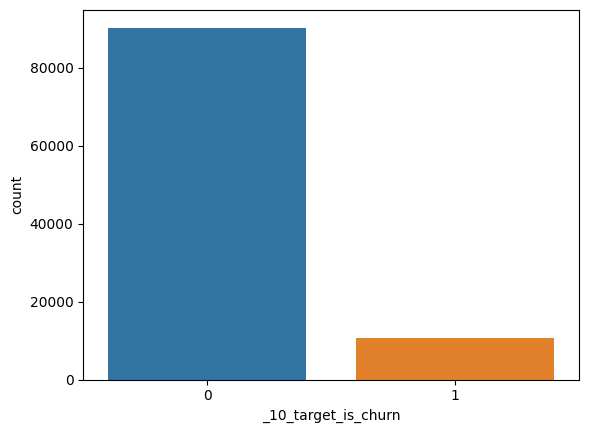

In [9]:
sb.countplot(x="_10_target_is_churn", data=data)
print(data.groupby('_10_target_is_churn').count())

As we could have expected, the dataset is very unbalanced with about 10% of customer who have churned. 

## Correlations

In [10]:
df_corr = features.corrwith(data["_10_target_is_churn"])
print(df_corr.sort_values(ascending=False))

_2_transactional_recency               0.443874
_2_avg_days_between_orders             0.271543
_2_std_days_between_orders             0.191776
_3_pcts_gross_turnover_7               0.030758
_3_pcts_gross_turnover_6               0.008397
_3_pcts_gross_turnover_9              -0.010044
_3_turnover_24months                  -0.035074
_3_pcts_gross_turnover_4              -0.035334
_3_average_cart_24months_percentile   -0.042527
_3_pcts_gross_turnover_3              -0.046453
_3_pcts_gross_turnover_1              -0.060201
_1_customer_tenure_months             -0.153257
_2_pct_frequency_6months              -0.176698
_2_pct_frequency_12months             -0.200098
_2_frequency_24months                 -0.234029
dtype: float64


<Axes: >

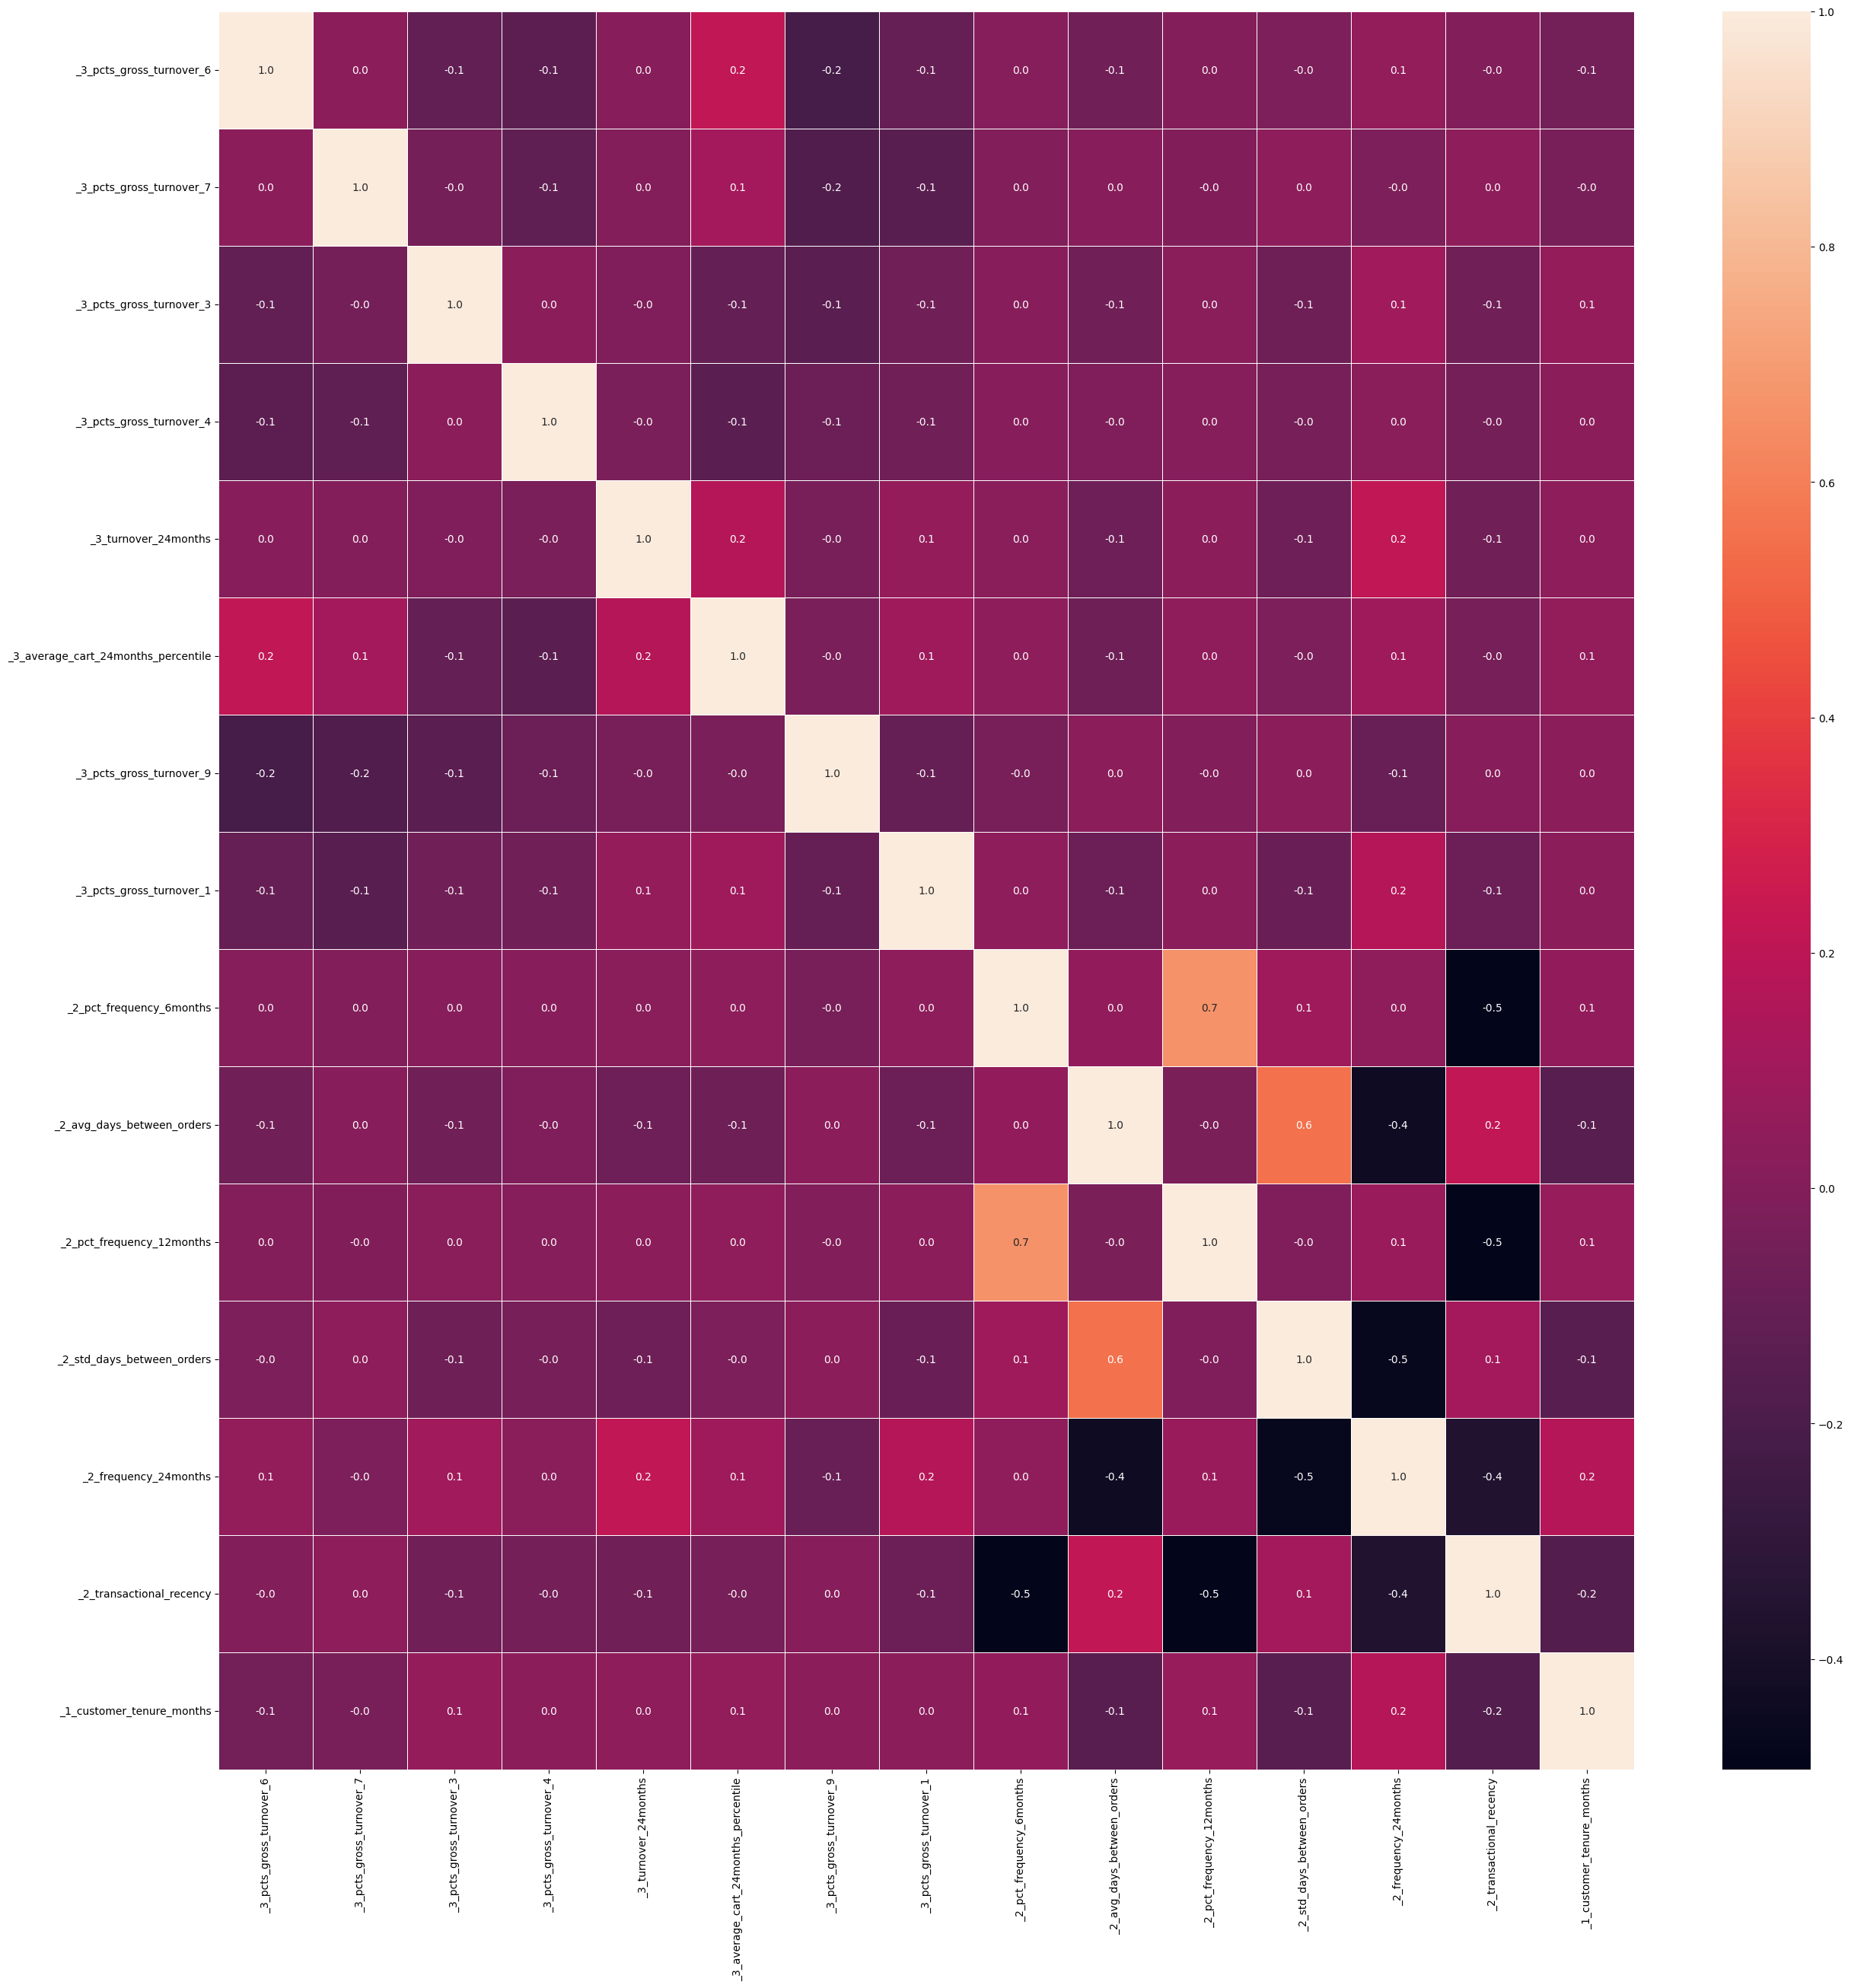

In [11]:
f,ax = plt.subplots(figsize=(30, 30))
sb.heatmap(features.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Nor features are strongly correlated between them, neither with the target feature. 

## Outliers

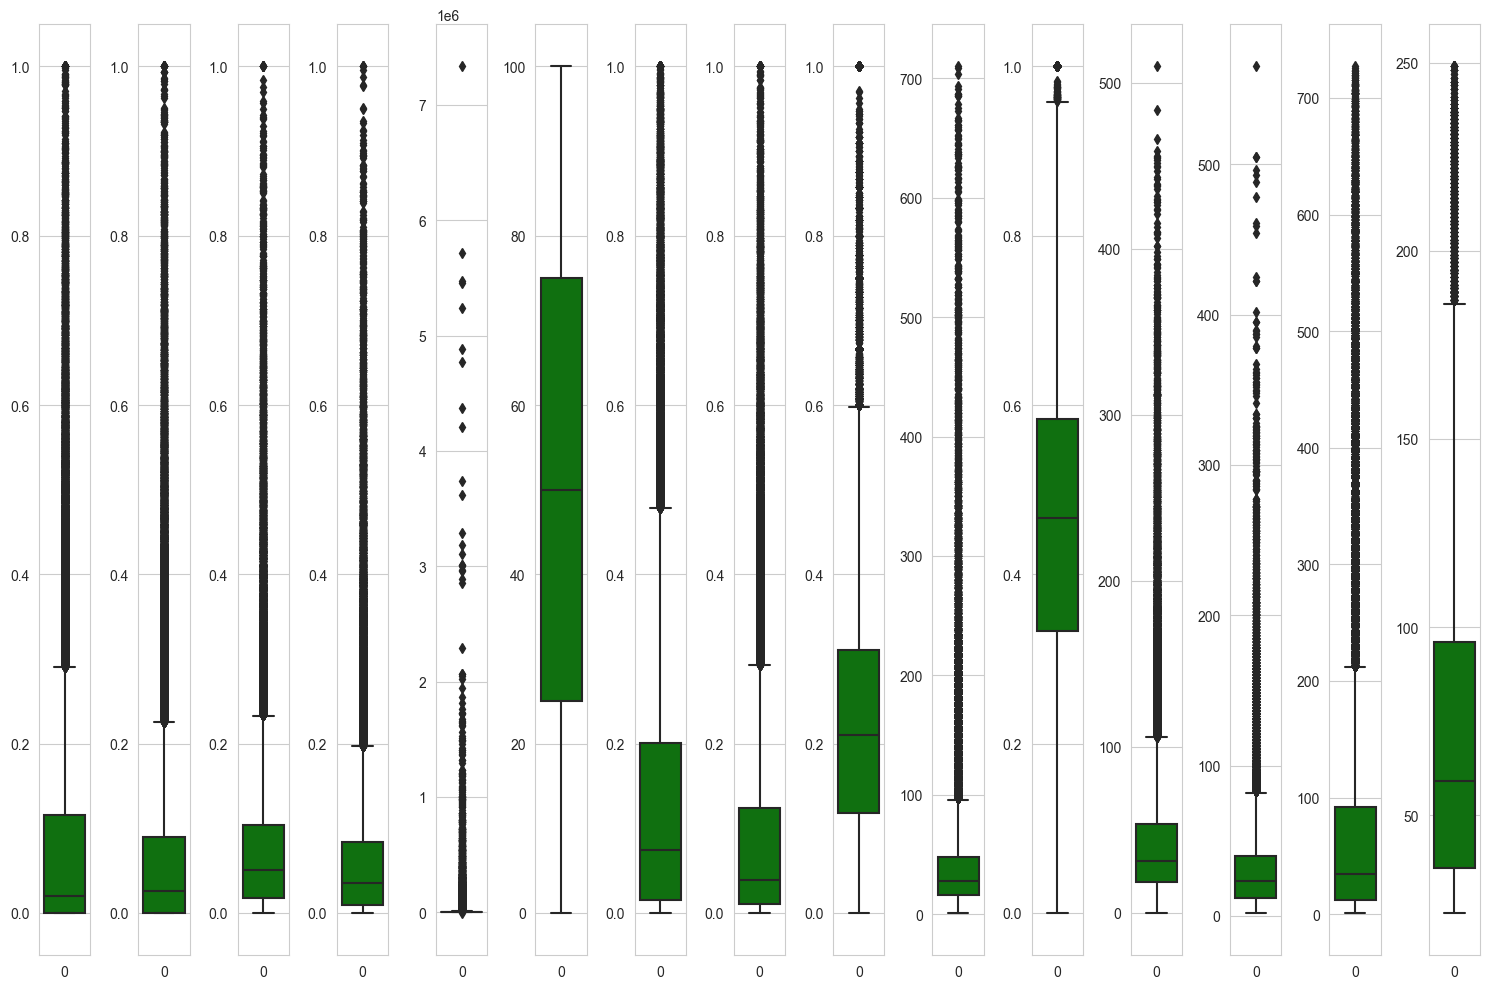

In [16]:

plt.figure(figsize=(15,10))
cols = data.columns[1:]

for i in range(0,15):
    plt.subplot(1,15,i+1)
    sb.set_style('whitegrid')
    sb.boxplot(data[cols[i]],color='green',orient='v')
    plt.tight_layout()



In [13]:
data.columns

Index(['customer_ID', '_3_pcts_gross_turnover_6', '_3_pcts_gross_turnover_7',
       '_3_pcts_gross_turnover_3', '_3_pcts_gross_turnover_4',
       '_3_turnover_24months', '_3_average_cart_24months_percentile',
       '_3_pcts_gross_turnover_9', '_3_pcts_gross_turnover_1',
       '_2_pct_frequency_6months', '_2_avg_days_between_orders',
       '_2_pct_frequency_12months', '_2_std_days_between_orders',
       '_2_frequency_24months', '_2_transactional_recency',
       '_1_customer_tenure_months', '_10_target_is_churn'],
      dtype='object')

/var/folders/y5/_6dy62xn00l7f2kmvgqsn9cc0000gn/T/ipykernel_1625/1449551592.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sb.kdeplot(data=df, x=col, hue='target_is_churn', fill=True, ax=ax)


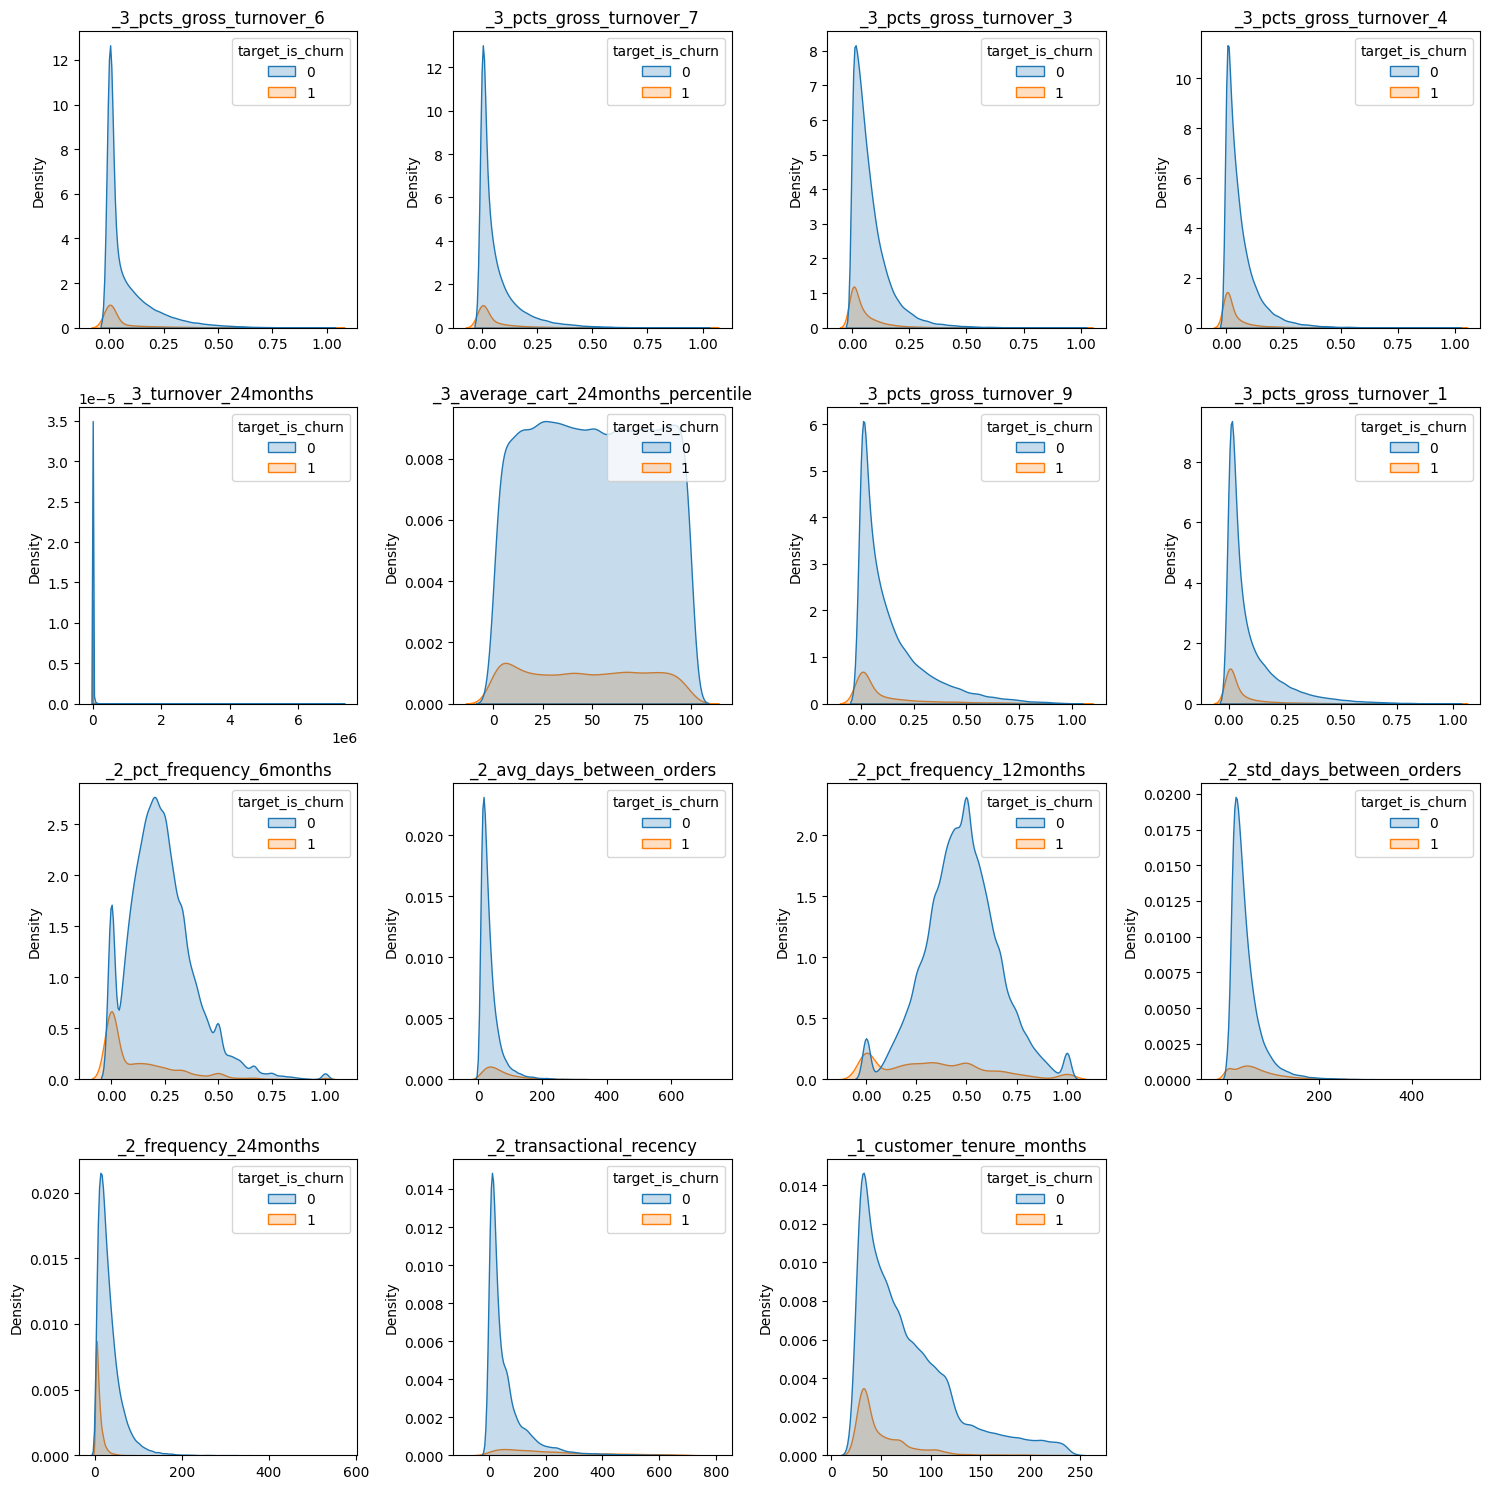

In [36]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15), sharex=False, sharey=False)
axes = axes.ravel()  # array to 1D
cols = data.columns[1:]  # create a list of dataframe columns to use

for col, ax in zip(cols, axes):
    #df = pd.concat([data[col], data['_10_target_is_churn']], axis=1)
    df = pd.DataFrame({col: data[col], 'target_is_churn': data['_10_target_is_churn']})
    #df = data[[col, '_10_target_is_churn']]  # select the data
    sb.kdeplot(data=df, x=col, hue='target_is_churn', fill=True, ax=ax)
    ax.set(title=f'{col}', xlabel=None)
    
fig.delaxes(axes[15])  # delete the empty subplot
fig.tight_layout()
plt.show()